# Imports

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import re
import json

In [2]:
COLOR_BG = "#a8dadc"
COLOR_FG = "#457b9d"
SIZE_BG_NODES = 800
SIZE_FG_NODES = 2400

EDGE_BG_WEIGHT = 4
EDGE_FG_WEIGHT = 24

MATRIX_SIDE = 10
NO_FG_NODES = 20

FIG_SIZE = (12, 12)

# Activity 2

## 2.1 Sub-activity: Graph creation

### Task 1 

In [3]:
def convert_node_name_to_index(node_name,num_per_row):
    """
        :param:node_name: Integer representes the node in one dimensional coordinate
               num_per_row: Interger represents MATRIX_SIDE in the graph
        :return:
                node in two dimensional coordinate;
                
        example: 0 ->(0,0)  10->(0,1) 99->(9,9)
        """
    div = node_name // num_per_row 
    mod = node_name % num_per_row
    return [mod,div]

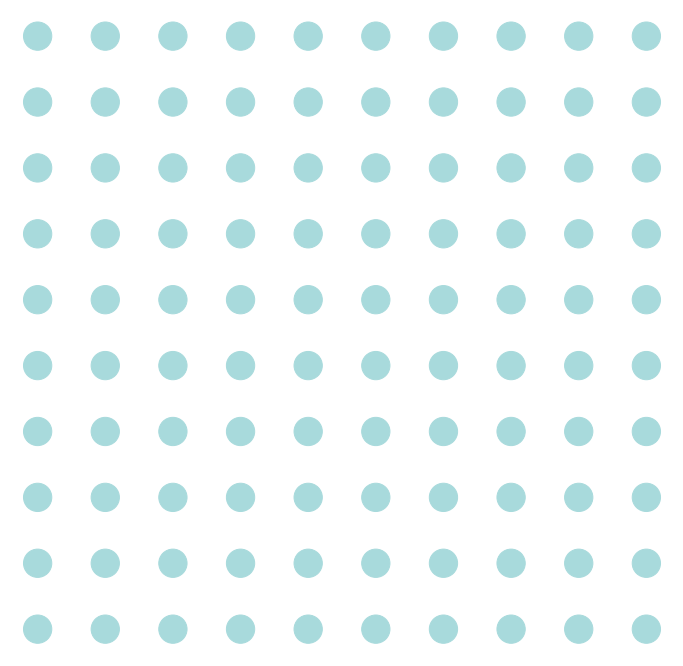

In [4]:
fig = plt.figure(figsize=FIG_SIZE)
limits = plt.axis("off")
G = nx.Graph()
# construct node name
node_name = ['node_'+str(x) for x in range(MATRIX_SIDE*MATRIX_SIDE)]
# construct node attribute
node_attribute = {'size':SIZE_BG_NODES,
                  'color':COLOR_BG,
                  'node_type': 'bg'}
# record node of background positions
bg_pos = {}
accumulator = 0
for row in range(MATRIX_SIDE):
    for col in range(MATRIX_SIDE):
        node_name = "node_" + str(accumulator)
        node_position = convert_node_name_to_index(accumulator,MATRIX_SIDE)
        accumulator += 1
        bg_pos[node_name] = node_position
        G.add_nodes_from([(node_name,node_attribute)])
# record node size
node_size =[G.nodes['node_'+str(i)]['size'] for i in range(MATRIX_SIDE*MATRIX_SIDE)]
# record node color
node_color = [G.nodes['node_'+str(i)]['color'] for i in range(MATRIX_SIDE*MATRIX_SIDE)]
# draw the nodes given the parameters defined above.
nx.draw_networkx(G, bg_pos,node_color = node_color,node_size=node_size,with_labels=False,)    
plt.show()       

###  Task 2

In [5]:
def compute_FG_position(number_of_FG_required,MATRIX_SIDE):
    """
        :param number_of_FG_required: Integer represents the number of foreground nodes needed
        :return: a list of tumples represents the 2 dimensional coordinate of foreground nodes.
    """
    FG_position = []
    while True:
        current_x = random.randint(1,MATRIX_SIDE-2)
        current_y = random.randint(1,MATRIX_SIDE-2)
        potential_coordinate = [current_x,current_y]
        if not potential_coordinate in FG_position:
            FG_position.append(potential_coordinate)
        if len(FG_position) == number_of_FG_required:
            break
    return FG_position
        

In [6]:
def convert_2d_name_to_1dindex(x,y,MATRIX_SIDE):
    """
        :param: x: horizontal coordinate of a node
                y: vertical coordinat of a node
                MATRIX_SIDE: Interger represents MATRIX_SIDE in the graph
        :return:
        
        this function returns one dimensional coordinate of a node given two dimensional coordinate
        example: (0,0) ->0  (9,9) -> 99
    """
    return y*MATRIX_SIDE+x

In [7]:
# compute foreground positions
fg_pos_list = compute_FG_position(NO_FG_NODES,MATRIX_SIDE)

In [8]:
# change the attribute of foreground nodes
for current_node in fg_pos_list:
    index = convert_2d_name_to_1dindex(current_node[0],current_node[1],MATRIX_SIDE)
    name = 'node_'+str(index)
    G.nodes[name]['node_type'] = 'fg'
    G.nodes[name]['size'] = SIZE_FG_NODES
    G.nodes[name]['color'] = "#457b9d"

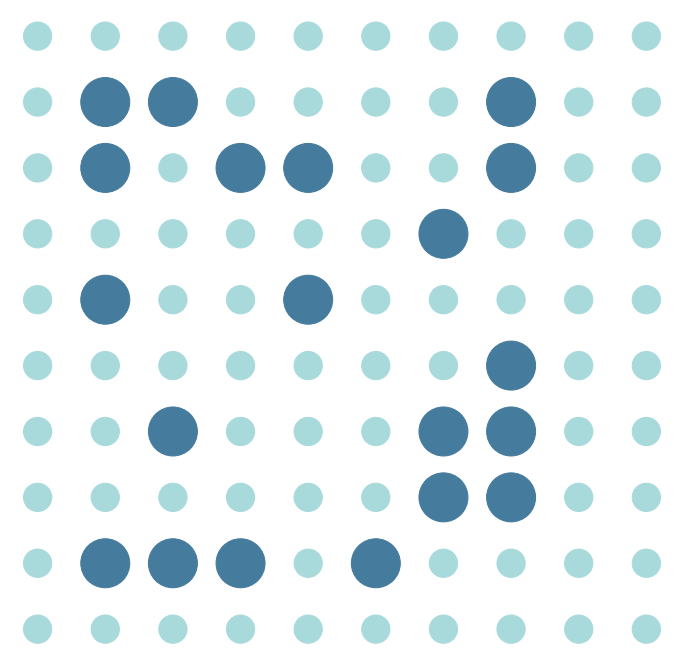

In [9]:
# draw the foreground nodes in the canvas.
fig = plt.figure(figsize=FIG_SIZE)
limits = plt.axis("off")
fg_node =[]
count = 0
for current_fg in fg_pos_list:
    index = convert_2d_name_to_1dindex(current_fg[0],current_fg[1],MATRIX_SIDE)
    node_size[index] =  SIZE_FG_NODES
    node_color[index] = COLOR_FG
# draw the nodes given the parameters defined above.
nx.draw_networkx(G, bg_pos,node_color = node_color,node_size=node_size,with_labels=False)    
plt.show()       

### Task 3

In [10]:
def compute_bg_neighbour(one_dim):
    """
        :param one_dim: coordiante of a background node in one dimensional form
        :return: its background neighbours.
        """
    result = []
    two_dim = convert_node_name_to_index(one_dim,MATRIX_SIDE)
    if two_dim[0] + 1 < MATRIX_SIDE:
        tmp = convert_2d_name_to_1dindex(two_dim[0] + 1,two_dim[1],MATRIX_SIDE)
        result.append(tmp)
    if two_dim[1] + 1< MATRIX_SIDE:
        tmp = convert_2d_name_to_1dindex(two_dim[0],two_dim[1]+ 1,MATRIX_SIDE)
        result.append(tmp)
    if two_dim[0] + 1 < MATRIX_SIDE and two_dim[1] + 1< MATRIX_SIDE:
        tmp = convert_2d_name_to_1dindex(two_dim[0]+1,two_dim[1]+ 1,MATRIX_SIDE)
        result.append(tmp)
    if two_dim[0] - 1 >=0 and two_dim[1] + 1 < MATRIX_SIDE:
        tmp = convert_2d_name_to_1dindex(two_dim[0]-1,two_dim[1]+ 1,MATRIX_SIDE)
        result.append(tmp)
    return result

In [11]:
def compute_fg_neighbour(noe_dim):
    """
        :param one_dim: coordiante of a foreground node in one dimensional form
        :return: its foreground neighbours.
        """
    result = []
    two_dim = convert_node_name_to_index(noe_dim,MATRIX_SIDE)
    if two_dim[0] + 1 < MATRIX_SIDE:
        tmp = convert_2d_name_to_1dindex(two_dim[0] + 1,two_dim[1],MATRIX_SIDE)
        result.append(tmp)
    if two_dim[1] + 1< MATRIX_SIDE:
        tmp = convert_2d_name_to_1dindex(two_dim[0],two_dim[1]+ 1,MATRIX_SIDE)
        result.append(tmp)
    return result

In [12]:
# record the edges of the nodes.
edge_list =[]
edge_color_list =[]
width_list = []

# deal with bg
for node in G.nodes:
    index = re.findall(r"\d+",node)
    neighbours = compute_bg_neighbour(int(index[0]))
    if len(neighbours) != 0:
        for current_neighbour in neighbours:
            neighbour_name = 'node_'+str(current_neighbour)
            if G.nodes[node]['node_type'] =='bg':
                if G.nodes[neighbour_name]['node_type'] == 'bg':
                    edge_list.append((node,neighbour_name))
                    edge_color_list.append(COLOR_BG)
                    width_list.append(EDGE_BG_WEIGHT)

# deal with fg
for node in G.nodes:
    if G.nodes[node]['node_type'] == 'fg':
        index = re.findall(r"\d+",node)
        neighbours = compute_fg_neighbour(int(index[0]))
        if len(neighbours) != 0:
            for current_neighbour in neighbours:
                neighbour_name = 'node_'+str(current_neighbour)
                if G.nodes[neighbour_name]['node_type'] == 'fg':
                    edge_list.append((node,neighbour_name))
                    edge_color_list.append(COLOR_FG)
                    width_list.append(EDGE_FG_WEIGHT)

n  = len(edge_list)
for i in range(n):
    G.add_edge(edge_list[i][0],edge_list[i][1],color = edge_color_list[i],width = width_list[i])
    

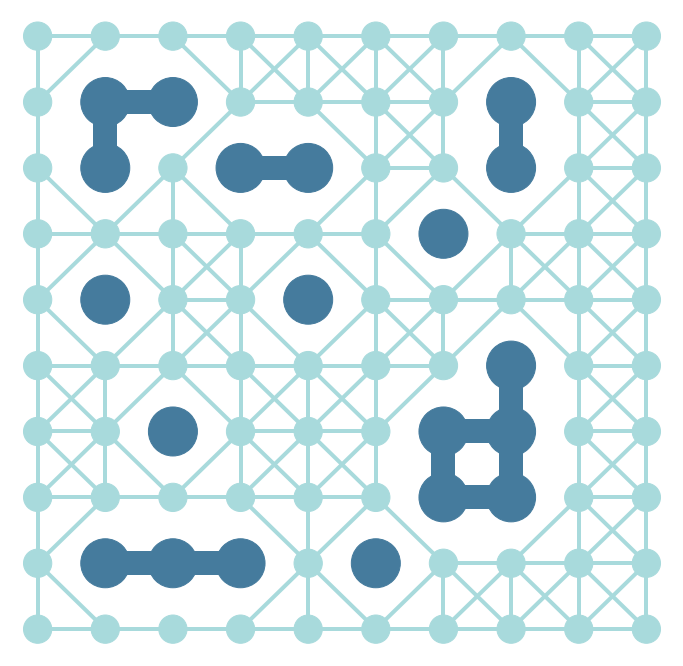

In [13]:
fig = plt.figure(figsize=FIG_SIZE)
limits = plt.axis("off")
# draw the edges on the graph
nx.draw_networkx(G, bg_pos,node_color = node_color,node_size=node_size,with_labels=False,edgelist =edge_list,edge_color = edge_color_list, width  = width_list)    

## 2.2 Sub-activity: Graph manipulation and output

### Task 4

In [14]:
# graph info
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 100
Number of edges: 211
Average degree:   4.2200


In [15]:
# density
print('The density of the graph is: {}'.format(nx.density(G)))

The density of the graph is: 0.04262626262626262


In [16]:
# degree centrality of its nodes
degree_centrality = nx.degree_centrality(G)
degree_centrality

{'node_0': 0.020202020202020204,
 'node_1': 0.030303030303030304,
 'node_2': 0.020202020202020204,
 'node_3': 0.030303030303030304,
 'node_4': 0.030303030303030304,
 'node_5': 0.04040404040404041,
 'node_6': 0.04040404040404041,
 'node_7': 0.05050505050505051,
 'node_8': 0.05050505050505051,
 'node_9': 0.030303030303030304,
 'node_10': 0.04040404040404041,
 'node_11': 0.010101010101010102,
 'node_12': 0.020202020202020204,
 'node_13': 0.010101010101010102,
 'node_14': 0.06060606060606061,
 'node_15': 0.0,
 'node_16': 0.05050505050505051,
 'node_17': 0.06060606060606061,
 'node_18': 0.07070707070707072,
 'node_19': 0.05050505050505051,
 'node_20': 0.04040404040404041,
 'node_21': 0.05050505050505051,
 'node_22': 0.04040404040404041,
 'node_23': 0.05050505050505051,
 'node_24': 0.06060606060606061,
 'node_25': 0.05050505050505051,
 'node_26': 0.020202020202020204,
 'node_27': 0.020202020202020204,
 'node_28': 0.06060606060606061,
 'node_29': 0.05050505050505051,
 'node_30': 0.05050505050

### Task 5

In [17]:
# export data in json format
my_json = nx.json_graph.node_link_data(G)
mp_json = json.dumps(my_json, indent=4)
print(mp_json)
with open("masterpiece_data", "w") as file:
    file.write(mp_json)

{
    "directed": false,
    "multigraph": false,
    "graph": {},
    "nodes": [
        {
            "size": 800,
            "color": "#a8dadc",
            "node_type": "bg",
            "id": "node_0"
        },
        {
            "size": 800,
            "color": "#a8dadc",
            "node_type": "bg",
            "id": "node_1"
        },
        {
            "size": 800,
            "color": "#a8dadc",
            "node_type": "bg",
            "id": "node_2"
        },
        {
            "size": 800,
            "color": "#a8dadc",
            "node_type": "bg",
            "id": "node_3"
        },
        {
            "size": 800,
            "color": "#a8dadc",
            "node_type": "bg",
            "id": "node_4"
        },
        {
            "size": 800,
            "color": "#a8dadc",
            "node_type": "bg",
            "id": "node_5"
        },
        {
            "size": 800,
            "color": "#a8dadc",
            "node_type": "bg",
    